# TMDB - Analisando dados

## Obtendo e conhecendo os dados

In [2]:
import pandas as pd

tmdb_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-introducao-a-testes-estatisticos-com-python/tmdb_5000_movies.csv")
tmdb_df.head(7)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330


In [3]:
tmdb_df.describe()
# Mostra para cada coluna uma variavel estatistica diferente

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Visualizando dados

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

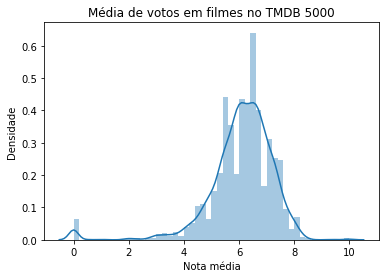

In [4]:
import seaborn as sns

ax = sns.distplot(tmdb_df.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000')

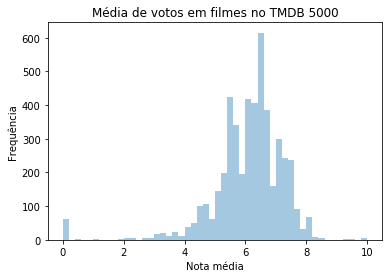

In [5]:
ax = sns.distplot(tmdb_df.vote_average, norm_hist=False, kde=False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")

## Distribuição normal

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000')

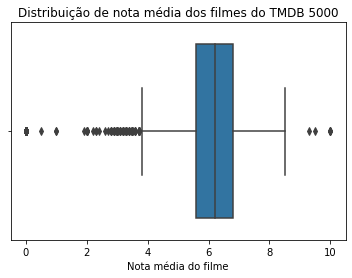

In [0]:
ax = sns.boxplot(x=tmdb_df.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000")
# Este bloco mostra a distribuição normal dos votos do filmes.

Estes pontos no primeiro e ultimo quatil mostram os Outlayers

**Filmes com nenhum voto**

In [0]:
tmdb_df.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


**Filmes com 10 votos**

In [0]:
tmdb_df.query("vote_average==10").head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1998-06-12,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1998-05-01,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],[],2015-07-07,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1


**Filmes com mais de 10 votos**

In [6]:
tmdb_com_mais_de_10_votos = tmdb_df.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


### Vizualizando informações dos filmes com mais de 10 votos

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

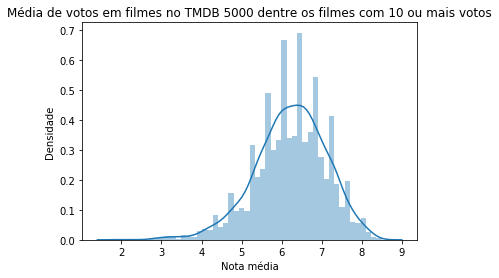

In [0]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos')

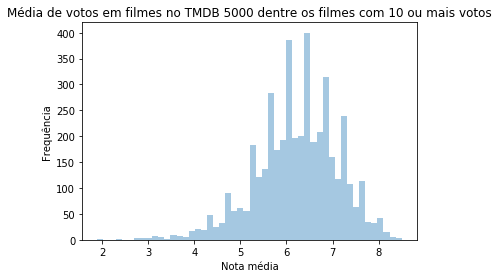

In [0]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False, kde=False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 dentre os filmes com 10 ou mais votos")

### Distribuição acumulativa das medias de notas com mais de 10 votos 

In [7]:
!pip install statsmodels --upgrade
# Ultima versão pois versão 0.9.0 está buggada

import statsmodels as sm
sm.__version__

     |████████████████████████████████| 8.7MB 2.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


'0.10.2'

Text(0.5, 1.0, 'Média de votos em filmes no TMDB 5000 com 10 ou mais votos')

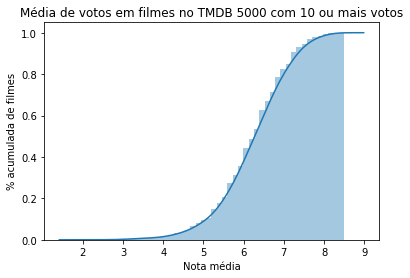

In [0]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no TMDB 5000 com 10 ou mais votos")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos')

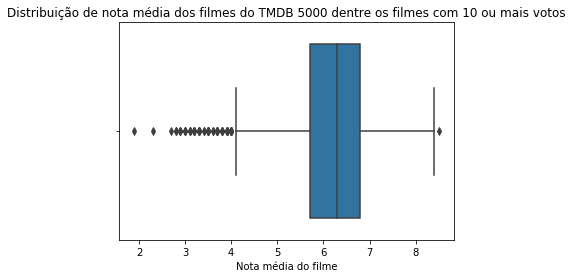

In [0]:
ax = sns.boxplot(x=tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos")

## Analisando outros campos do TMDB

Text(0.5, 1.0, 'Quantidade de votos em filmes no TMDB 5000 com 10 ou mais votos')

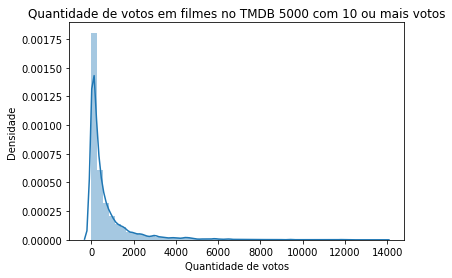

In [12]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(xlabel="Quantidade de votos", ylabel="Densidade")
ax.set_title("Quantidade de votos em filmes no TMDB 5000 com 10 ou mais votos")

Text(0.5, 1.0, 'Gastos dos filmes no TMDB 5000')

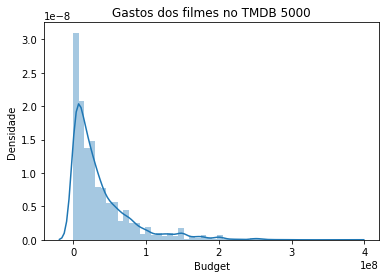

In [13]:
ax = sns.distplot(tmdb_df.query("budget > 0").budget)
ax.set(xlabel="Budget", ylabel="Densidade")
ax.set_title("Gastos dos filmes no TMDB 5000")

Text(0.5, 1.0, 'Popularidade em filmes no TMDB 5000')

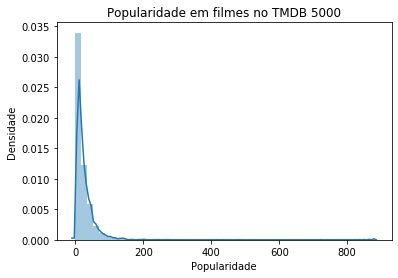

In [14]:
ax = sns.distplot(tmdb_df.popularity)
ax.set(xlabel="Popularidade", ylabel="Densidade")
ax.set_title("Popularidade em filmes no TMDB 5000")

## Removendo valores nulos

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

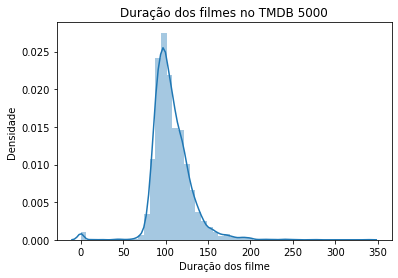

In [15]:
ax = sns.distplot(tmdb_df.runtime)
ax.set(xlabel="Duração dos filme", ylabel="Densidade")
ax.set_title("Duração dos filmes no TMDB 5000")

In [18]:
tmdb_df.runtime.isnull().sum()

2

Uma vez que a coluna de duração dos filmes possui dados nulos, é possivel remover com a função dropna, dessa forma não deixa ruidos na base

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

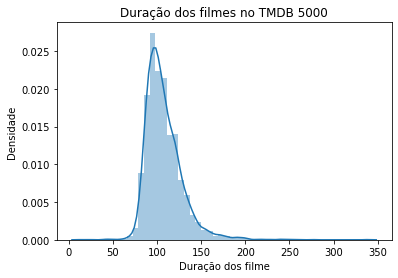

In [20]:
filmes_com_runtimes_validos = tmdb_df.query("runtime > 0")
ax = sns.distplot(filmes_com_runtimes_validos.runtime.dropna())
ax.set(xlabel="Duração dos filme", ylabel="Densidade")
ax.set_title("Duração dos filmes no TMDB 5000")

## Histograma cumulativo e quantil

Podemos usar o histograma cumulativo do sns e saber por exemplo que 40% dos filmes tem 100m

Text(0.5, 1.0, 'Duração dos filmes no TMDB 5000')

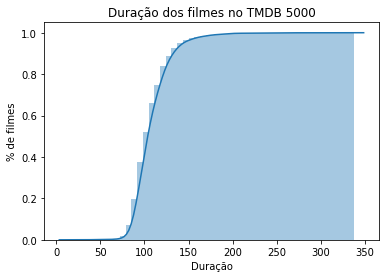

In [21]:
ax = sns.distplot(filmes_com_runtimes_validos.runtime.dropna(), hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
ax.set(xlabel="Duração", ylabel="% de filmes")
ax.set_title("Duração dos filmes no TMDB 5000")

Outra forma é utilziando a função quantile, esta mostra a quantidade de que separa x% do conjunto

In [22]:
filmes_com_runtimes_validos.runtime.dropna().quantile(0.4)

100.0

# Movielens - Analisando dados

## Obtendo e conhecendo os dados

In [25]:
movielens_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-introducao-a-testes-estatisticos-com-python/ratings.csv")
movielens_df.head(7)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868


In [26]:
nota_media_por_filme = movielens_df.groupby("movieId").mean()["rating"]
nota_media_por_filme.head(7)

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
6    3.946078
7    3.185185
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k')

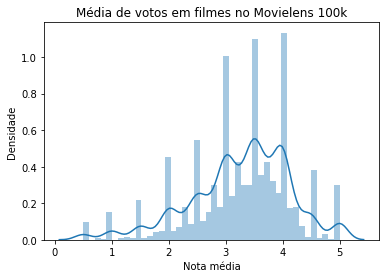

In [27]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k")

In [28]:
# Obtem o indice no DF dos filmes com >= 10 votos
quantidade_de_votos_por_filme = movielens_df.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [29]:
# Após obtido o indice, busca por eles utilizaindo LOC para pegar a mediad eles
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

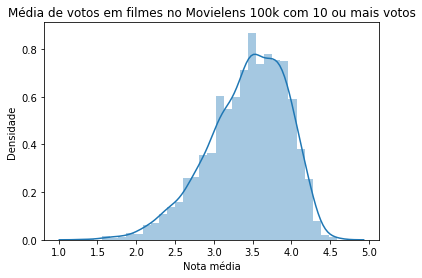

In [30]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

Text(0.5, 1.0, 'Média de votos em filmes no Movielens 100k com 10 ou mais votos')

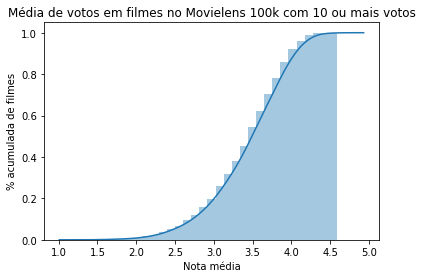

In [31]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, hist_kws = {'cumulative':True},  kde_kws = {'cumulative':True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no Movielens 100k com 10 ou mais votos")

Text(0.5, 1.0, 'Distribuição de nota média dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos')

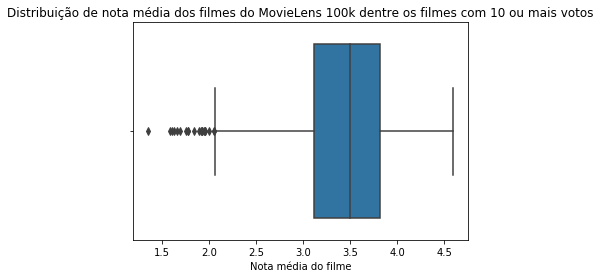

In [32]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de nota média dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos")

## Média dos filmes com pelo menos 10 votos

In [0]:
print("Média dos filmes com pelo menos 10 votos", nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352594


Visando evitar dados viciados, é possivel pegar pontos aleatorios do DF e ver a media deles.

Dessa forma evitamos pegar uma sequencia de dados viciados

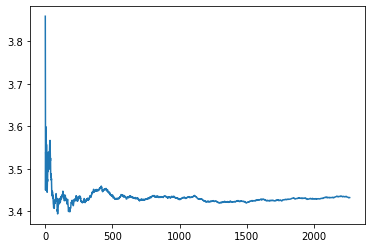

In [34]:
import matplotlib.pyplot as plt
import numpy as np

#pandas usa numpy por baixo, portanto au usar um seed, o sample vai sempre gerar 
#o mesmo conjunto aleatorio
np.random.seed(75243)

filmes_aleatorios_mais_de_10_votos = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [filmes_aleatorios_mais_de_10_votos[0:i].mean() for i in range(1, len(filmes_aleatorios_mais_de_10_votos))]

plt.plot(medias)

## Teste Z

In [0]:
intervalo de confiança baseado no teste-z de distribuição normal

Obs: este tipo de teste exige que uma amostra grande e normalidade dos dados

In [35]:
from statsmodels.stats.weightstats import zconfint

zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

Para testar se os dados se comportam como uma distribuição normal, o normaltest funciona perfeitamente.

Caso retorne menos que 5% (0.05), ele não e uma distribuição normal

In [79]:
from scipy.stats import normaltest

_, p = normaltest(nota_media_dos_filmes_com_pelo_menos_10_votos)
p

1.5887221913624558e-30

## Teste T

intervalo de confiança baseado no teste-z de distribuição normal

Obs: este tipo de teste exige normalidade dos dados, mas diferente do teste-z, ele exige que a amostra seja pequena

In [54]:
from statsmodels.stats.weightstats import DescrStatsW

descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Mais sobre Teste Z

## Analisando Toy Story

In [36]:
filmes_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/data-science-introducao-a-testes-estatisticos-com-python/movies.csv")
filmes_df.query("movieId == 1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [39]:
notas_de_toy_story = movielens_df.query("movieId == 1")
notas_de_toy_story.head(7)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
1772,18,1,3.5,1455209816
2274,19,1,4.0,965705637


Text(0.5, 1.0, 'Distribuição das notas de Toy Story')

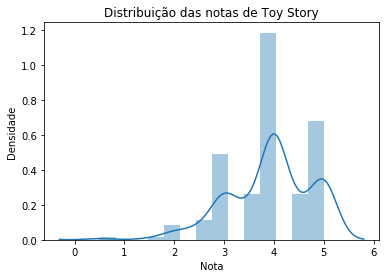

In [40]:
ax = sns.distplot(notas_de_toy_story.rating)
ax.set(xlabel="Nota", ylabel="Densidade")
ax.set_title("Distribuição das notas de Toy Story")

Text(0.5, 1.0, 'Distribuição das notas de Toy Story')

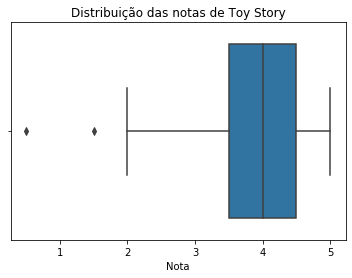

In [42]:
ax = sns.boxplot(notas_de_toy_story.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição das notas de Toy Story")

In [43]:
print("Media das notas: ", notas_de_toy_story.rating.mean())
print("Quantidade de notas: ", notas_de_toy_story.rating.count())
print("Intervalo de confiança das notas: ", zconfint(notas_de_toy_story.rating))

Media das notas:  3.9209302325581397
Quantidade de notas:  215
Intervalo de confiança das notas:  (3.8093359183563402, 4.032524546759939)


In [44]:
from statsmodels.stats.weightstats import ztest

ztest(notas_de_toy_story.rating, value = 3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

zteste devolve o valor estatístico e o pvalue (probabilidade) que diz se, no mundo real (notas gerais do TMDB), a média de toy story seria ou não igual a 3.4320503405352603 (nota média do TMDB).

Uma vez que o pvalue retorna menos que 5%, então a hipótese de que, no mundo real, a média do Toy Story **não** é igual a 3.4320503405352603. Este caso chama-se de hipótese nula.

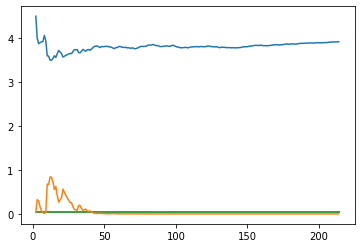

In [46]:
np.random.seed(75241)

rating_aleatorio_de_toy_story = notas_de_toy_story.sample(frac=1).rating

def calcula_teste(i):
  media = rating_aleatorio_de_toy_story[0:i].mean()

  _, p = ztest(rating_aleatorio_de_toy_story[0:i], value = 3.4320503405352594)

  return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(rating_aleatorio_de_toy_story))])

# Variação o pvalue
plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])

# Linha referencial dos 5%
plt.hlines(y = 0.05, xmin = 2, xmax = len(rating_aleatorio_de_toy_story), colors='g')

Como é possivel perceber, até pouco antes de 50 amostras a variação é bem instavel.

Por acaso, as notas no inicio ficam bem altas, mas após as 50 amostras tente a ficar mais instável.

# Comparação de dois conjuntos de amostras

## Comparações com ztest e zconfint

In [61]:
print("Comparação ztest    - Toy Story vs Todos: ", ztest(notas_de_toy_story.rating, movielens_df.rating))
print("Comparação zconfint - Toy Story vs Todos: ", zconfint(notas_de_toy_story.rating, movielens_df.rating))
print("\nObs: a ordem influencia no retorno")
print("Comparação ztest    - Todos vs Toy Story: ", ztest(movielens_df.rating, notas_de_toy_story.rating))
print("Comparação zconfint - Todos vs Toy Story: ", zconfint(movielens_df.rating, notas_de_toy_story.rating))

Comparação ztest    - Toy Story vs Todos:  (5.894327101501841, 3.762112778881965e-09)
Comparação zconfint - Toy Story vs Todos:  (0.2799245129192442, 0.5588219849631111)

Obs: a ordem influencia no retorno
Comparação ztest    - Todos vs Toy Story:  (-5.894327101501841, 3.762112778881965e-09)
Comparação zconfint - Todos vs Toy Story:  (-0.5588219849631111, -0.2799245129192442)


## Comparação com ttest_ind

In [62]:
from scipy.stats import ttest_ind

ttest_ind(movielens_df.rating, notas_de_toy_story.rating)

Ttest_indResult(statistic=-5.894327101501841, pvalue=3.774003138720876e-09)

## Comparações usando DescrStatsW

In [67]:
descr_todas_as_notas = DescrStatsW(movielens_df.rating)
descr_toy_story = DescrStatsW(notas_de_toy_story.rating)

comparacao = descr_todas_as_notas.get_compare(descr_toy_story)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [66]:
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


## Visualizando dados

Text(0.5, 1.0, 'Comparação das distribuição normais das notas de todos os filmes e Toy Story')

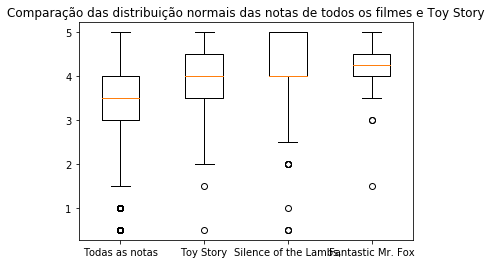

In [71]:
notas_silence_of_the_lambs = movielens_df.query("movieId == 593").rating
notas_fantastic_mr_fox = movielens_df.query("movieId == 72226").rating

lista_rating_de_filmes = [movielens_df.rating, notas_de_toy_story.rating, notas_silence_of_the_lambs, notas_fantastic_mr_fox]
labels=["Todas as notas", "Toy Story", "Silence of the Lambs,", "Fantastic Mr. Fox"]

plt.boxplot(lista_rating_de_filmes, labels=labels)
plt.title("Comparação das distribuição normais das notas de todos os filmes e Toy Story")

Caso a amostra fosse muito pequena, os resultados seriam bem diferentes

Text(0.5, 1.0, 'Comparação das distribuição normais das notas de todos os filmes e Toy Story')

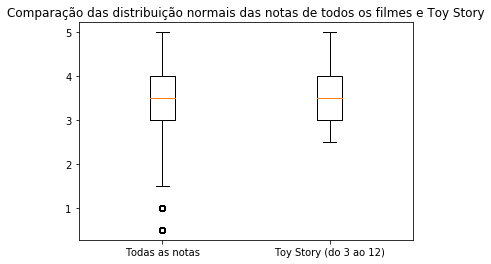

In [68]:
plt.boxplot([movielens_df.rating, notas_de_toy_story[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Comparação das distribuição normais das notas de todos os filmes e Toy Story")

Visualizando as descriçoes dos DF, estes são bem diferentes de quanto tinha uma amostra completa

In [73]:
descr_todas_as_notas = DescrStatsW(movielens_df.rating)
descr_toystory = DescrStatsW(notas_de_toy_story[3:12].rating)

comparacao = descr_todas_as_notas.get_compare(descr_toystory)

comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


In [74]:
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


Para verificarmos se duas amostras vieram da mesma distribuição, é possivel usar ranksums.

Neste caso, se for maior ou igual que 5% (0.05), as amostras realmente vieram de uma mesma distribuição. Caso não, os valores de uma amostra têm uma tendência a serem maiores que os da outra amostra.

Essa função consiste no teste Wilcoxon, que faz uma análise baseada em ranqueamento.

In [82]:
from scipy.stats import ranksums

_, p = ranksums(notas_de_toy_story.rating, notas_silence_of_the_lambs)
p

0.0003267718756440693